# Figuring out the picky match breakdown of events

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
df = pd.read_csv("/Users/mohammed/code/proton-deuterium-data/data/csv/picky+match.csv")

In [4]:
df

,run,subrun,event,p,m,beamline_mass
0,8675,12,1249,0,1,1082.48
1,8675,12,1250,0,0,120.62
2,8675,12,1256,0,1,893.74
3,8675,12,1257,1,0,180.31
4,8675,12,1258,1,1,-327.26
...,...,...,...,...,...,...
580633,9781,133,21593,0,1,1008.86
580634,9781,133,21596,0,1,1212.37
580635,9781,133,21614,0,0,951.96
580636,9781,133,21621,0,0,462.36


In [7]:
df = df[(df['beamline_mass'] > 0)].reset_index(drop=True)
df

,run,subrun,event,p,m,beamline_mass
0,8675,12,1249,0,1,1082.48
1,8675,12,1250,0,0,120.62
2,8675,12,1256,0,1,893.74
3,8675,12,1257,1,0,180.31
4,8675,12,1261,0,1,1102.05
...,...,...,...,...,...,...
480068,9781,133,21589,0,1,1337.60
480069,9781,133,21593,0,1,1008.86
480070,9781,133,21596,0,1,1212.37
480071,9781,133,21614,0,0,951.96


In [9]:
duplicates = df[df.duplicated()]
duplicates

,run,subrun,event,p,m,beamline_mass


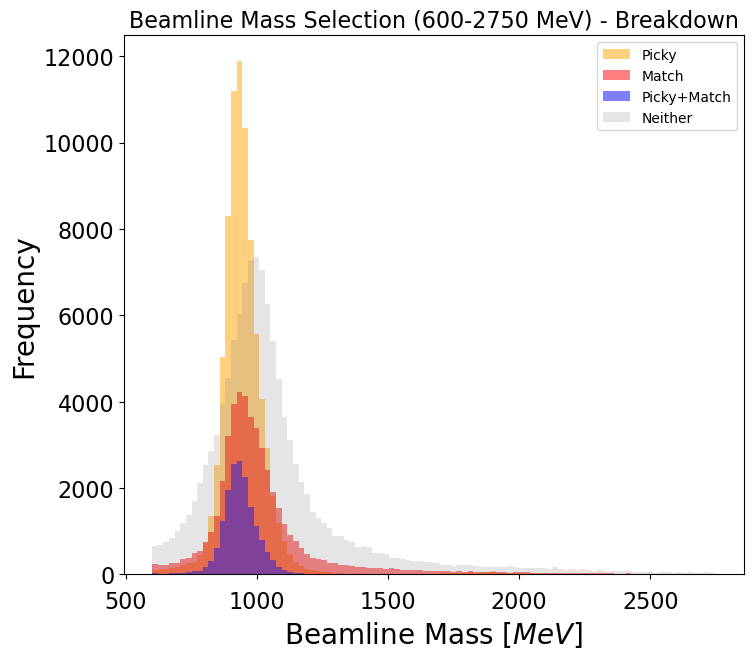

In [16]:

p = df[(df['p'] == 1)]['beamline_mass']
m = df[(df['m'] == 1)]['beamline_mass']
pm = df[(df['p'] == 1) & (df['m'] == 1)]['beamline_mass']
rest = df[(df['p'] == 0) & (df['m'] == 0)]['beamline_mass']

plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    p,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky'  # Label for the data
)

plt.hist(
    m,  # Data to plot
    bins=100,  # Number of bins
    color='red',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Match'  # Label for the data
)

plt.hist(
    pm,  # Data to plot
    bins=100,  # Number of bins
    color='blue',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky+Match'  # Label for the data
)

plt.hist(
    rest,  # Data to plot
    bins=100,  # Number of bins
    color='grey',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.2,  # Transparency of the bars
    label='Neither'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (600-2750 MeV) - Breakdown', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

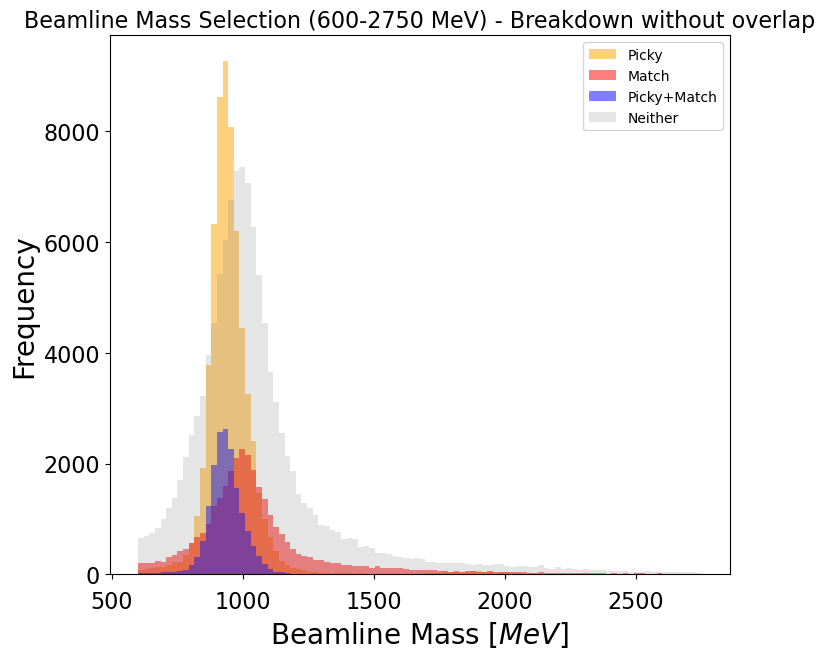

In [18]:

p = df[(df['p'] == 1) & (df['m'] == 0)]['beamline_mass']
m = df[(df['m'] == 1) & (df['p'] == 0)]['beamline_mass']
pm = df[(df['p'] == 1) & (df['m'] == 1)]['beamline_mass']
rest = df[(df['p'] == 0) & (df['m'] == 0)]['beamline_mass']

plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    p,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky'  # Label for the data
)

plt.hist(
    m,  # Data to plot
    bins=100,  # Number of bins
    color='red',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Match'  # Label for the data
)

plt.hist(
    pm,  # Data to plot
    bins=100,  # Number of bins
    color='blue',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky+Match'  # Label for the data
)

plt.hist(
    rest,  # Data to plot
    bins=100,  # Number of bins
    color='grey',  # Bar color
    range=(600, 2750),  # Adjusted range to fit the filtered values
    alpha=0.2,  # Transparency of the bars
    label='Neither'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (600-2750 MeV) - Breakdown without overlap', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

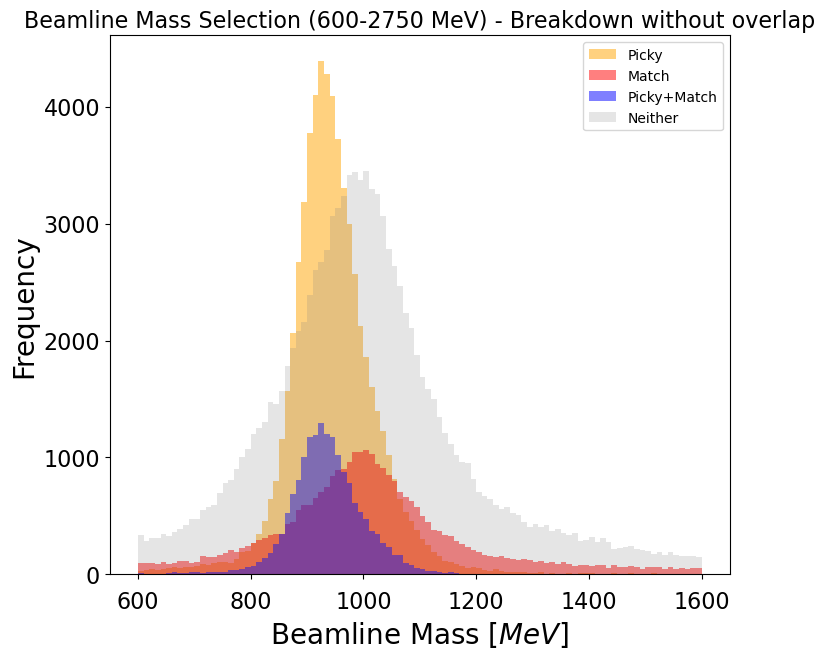

In [19]:
plt.figure(figsize=(8, 7))  # Create a figure with specified size

plt.hist(
    p,  # Data to plot
    bins=100,  # Number of bins
    color='orange',  # Bar color
    range=(600, 1600),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky'  # Label for the data
)

plt.hist(
    m,  # Data to plot
    bins=100,  # Number of bins
    color='red',  # Bar color
    range=(600, 1600),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Match'  # Label for the data
)

plt.hist(
    pm,  # Data to plot
    bins=100,  # Number of bins
    color='blue',  # Bar color
    range=(600, 1600),  # Adjusted range to fit the filtered values
    alpha=0.5,  # Transparency of the bars
    label='Picky+Match'  # Label for the data
)

plt.hist(
    rest,  # Data to plot
    bins=100,  # Number of bins
    color='grey',  # Bar color
    range=(600, 1600),  # Adjusted range to fit the filtered values
    alpha=0.2,  # Transparency of the bars
    label='Neither'  # Label for the data
)

# Customize tick parameters for better visualization
plt.tick_params(axis='x', labelsize=16, pad=8)
plt.tick_params(axis='y', labelsize=16)

# Label axes
plt.xlabel('Beamline Mass [$MeV$]', fontsize=20)
plt.ylabel('Frequency', fontsize=20)  # Added y-axis label for clarity

# Add a title
plt.title('Beamline Mass Selection (600-2750 MeV) - Breakdown without overlap', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()